In [1]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import StandardScaler
import numpy
from sklearn.neighbors import KNeighborsClassifier

# Úkol-05: Fyzická kondice

In [2]:
data = pandas.read_csv("bodyPerformance.csv")
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


Uvažuj, že chceš přijímat lidi do organizace, která vyžaduje vysokou fyzickou výkonnost. Tvou snahou je zkrátit a zefektivnit přijímací proces. Zkus tedy zjistit, nakolik přesné je zařazení jedinců do výkonnostních tříd bez nutnosti měření jejich výkoknu při vykonání jednotlivých cviků. Využij tedy všechny vstupní proměnné s výjimkou sit and bend forward_cm, sit-ups counts a broad jump_cm.

In [3]:
y = data["class"]

categorical_columns = ["gender"]
numeric_columns = ["age", "height_cm", "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce"]
numeric_data = data[numeric_columns].to_numpy()

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

gender_labels = list(encoder.get_feature_names_out())

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

### Rozhodovací strom

K rozřazení jedinců do skupin využij rozhodovací strom a jeden ze zbývajících dvou algoritmů probíraných na lekcích (tj. K Nearest Neighbours nebo Support Vector Machine). Rozhodovacímu stromu omez maximální počet pater na 5 a poté si zobraz graficky a vlož ho do Jupyter notebooku nebo jako obrázek ve formátu PNG jako součást řešení.

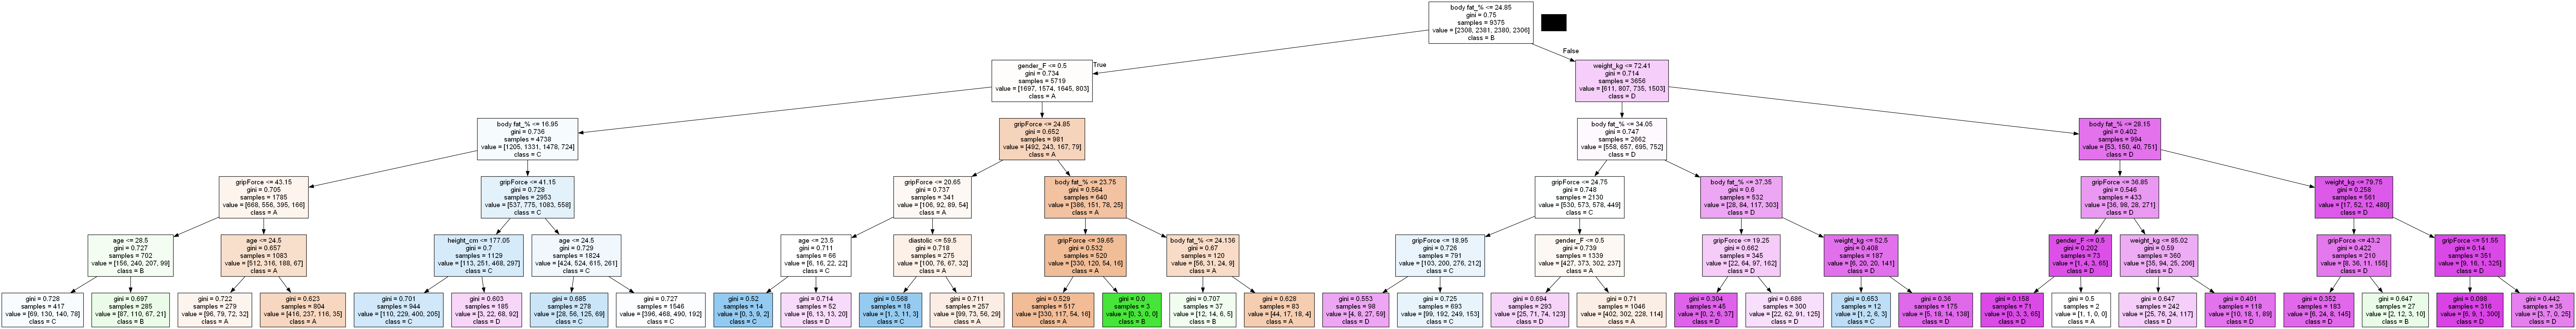

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_tree = DecisionTreeClassifier(max_depth=5)
clf_tree = clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test)
#zobrazení výsledného stromu
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data, filled=True, feature_names=gender_labels + numeric_columns, class_names=["A", "B", "C", "D"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Vytvoř matici záměn pro rozhodovací strom. Kolik jedinců s nejvyšší fyzickou výkonností (tj. ze skupiny A) bylo klasifikování správně? Kolik pak bylo zařazeno do skupin B, C a D? Uveď výsledky do komentáře v programu nebo do buňky v Jupyter notebooku.

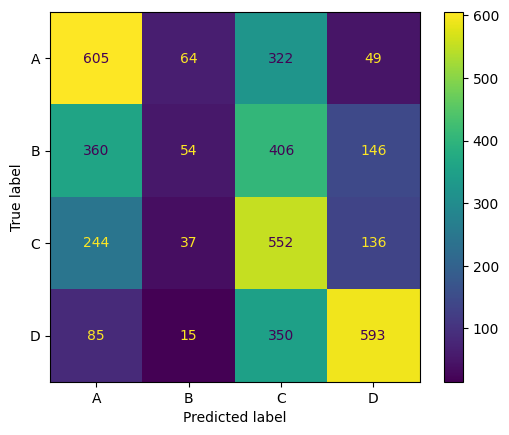

In [5]:
ConfusionMatrixDisplay.from_estimator(clf_tree, X_test, y_test)

Správně bylo klasifikováno 605 jedinců ze skupiny A. Zbytek jedinců z této skupiny bylo mylně klasifikováno do skupin B (64), C (322) a D (49)

Urči metriku accuracy pro rozhodovací strom a pro jeden ze dvou vybraných algoritmů. Který algoritmus si vedl lépe? Odpověď napiš do komentáře.

In [6]:
accuracy_score(y_test, y_pred)

0.4489795918367347

Accuracy pro rozhodovací strom je 44,9 %. Pro KNN je to 43,9 %. Lépe si vedl rozhodovací strom, ale je to těsné.

### K Nearest Neighbours

In [7]:
#škálování numerických dat
scaler = StandardScaler()
numeric_cols_scaled = scaler.fit_transform(data[numeric_columns])
numeric_cols_scaled

array([[-0.71743212,  0.44387298,  0.65215002, ...,  0.1120089 ,
        -0.01595937,  1.68819029],
       [-0.8642197 , -0.42246548, -0.97473438, ..., -0.16727827,
        -0.28782032, -0.05307347],
       [-0.42385695,  1.31021144,  0.88312744, ...,  1.22915757,
         1.47927584,  0.7375544 ],
       ...,
       [ 0.16329338,  1.02538783,  1.09234611, ..., -0.07418255,
         0.1199711 ,  2.49764263],
       [ 1.99813815, -2.66545136, -0.81572819, ..., -1.00513978,
        -0.6276465 , -1.66256592],
       [-0.20367558, -0.54114198, -0.11275345, ...,  0.29820034,
         1.34334536, -0.10013466]])

In [8]:
X2 = numpy.concatenate([encoded_columns, numeric_cols_scaled], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

clf_knn = KNeighborsClassifier()
params = {"n_neighbors": range(1,20,1)}
clf_grid = GridSearchCV(clf_knn, params, scoring="accuracy")
clf_grid.fit(X2, y)

clf_grid.best_params_

{'n_neighbors': 19}

In [10]:
clf_grid.best_score_

0.43896031451995315

Nyní uvažuj, že se rozhodneš testovat jedince pomocí jednoho ze cviků. Vyber cvik, který dle tebe nejvíce vypovídá o fyzické výkonnosti jedince. Porovnej, o kolik se zvýšila hodnota metriky accuracy pro oba algoritmy.

In [16]:
#přidání skoku do dálky
numeric_columns2 = ["age", "height_cm", "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce", "broad jump_cm"]
numeric_data = data[numeric_columns2].to_numpy()
X3 = numpy.concatenate([encoded_columns, numeric_data], axis=1)

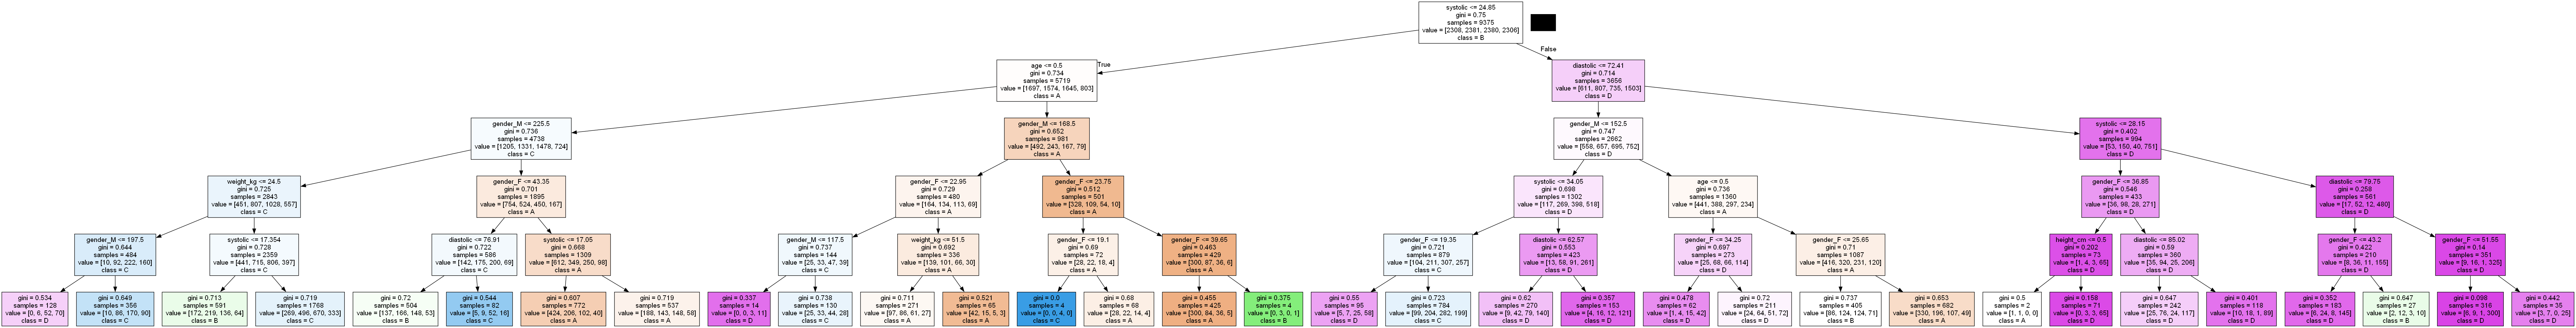

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)

clf_tree = clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test)
#zobrazení výsledného stromu
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data, filled=True, feature_names=numeric_columns2 + gender_labels, class_names=["A", "B", "C", "D"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [20]:
accuracy_score(y_test, y_pred)

0.47809855649576904

Accuracy stromu se po přidání skoku do dálky zvýšila o 2,9 p. b.

In [21]:
numeric_cols_scaled2 = scaler.fit_transform(data[numeric_columns2])
numeric_cols_scaled2

array([[-0.71743212,  0.44387298,  0.65215002, ..., -0.01595937,
         1.68819029,  0.67400862],
       [-0.8642197 , -0.42246548, -0.97473438, ..., -0.28782032,
        -0.05307347,  0.97501314],
       [-0.42385695,  1.31021144,  0.88312744, ...,  1.47927584,
         0.7375544 , -0.22900492],
       ...,
       [ 0.16329338,  1.02538783,  1.09234611, ...,  0.1199711 ,
         2.49764263,  0.97501314],
       [ 1.99813815, -2.66545136, -0.81572819, ..., -0.6276465 ,
        -1.66256592, -2.88787813],
       [-0.20367558, -0.54114198, -0.11275345, ...,  1.34334536,
        -0.10013466, -0.25408863]])

In [22]:
X4 = numpy.concatenate([encoded_columns, numeric_cols_scaled2], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3, random_state=42)

params = {"n_neighbors": range(1,20,1)}
clf_grid = GridSearchCV(clf_knn, params, scoring="accuracy")
clf_grid.fit(X4, y)

clf_grid.best_score_

0.4684541426819556

Accuracy algoritmu K Nearest Neighbours se po přidání skoku do dálky zvýšila také o 2,9 p. b.